<a href="https://colab.research.google.com/github/mateoesteva/Proyectos-Mateo/blob/main/DS_C3_SC1_MATEOESTEVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [2]:
happiness = pd.read_csv('Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.



In [3]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico = mexico.set_index('Country or region')
mexico
#

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.


Text(0.5, 1.0, 'Distribución de puntajes')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


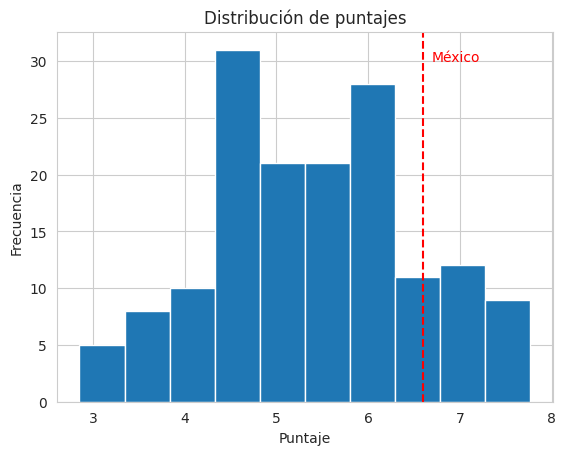

In [4]:
sns.set_style('whitegrid')
happiness['Score'].plot(kind = 'hist')
plt.axvline(x = mexico['Score'].iloc[0], color = 'r', linestyle = '--')
plt.text(mexico['Score']+0.1, 30,'México', color = 'r')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntajes')


Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.


Text(0, 0.5, 'Esperanza de vida')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


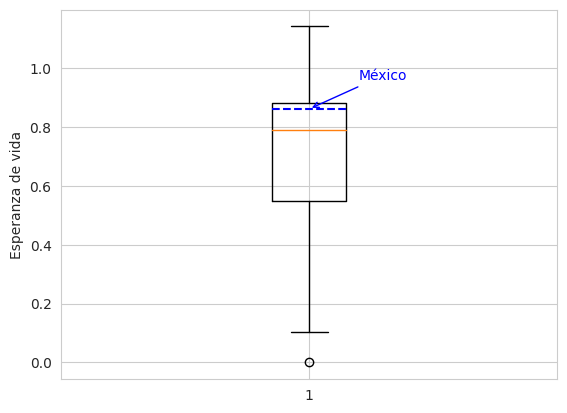

In [5]:
plt.boxplot(happiness['Healthy life expectancy'])
plt.axhline(y = mexico['Healthy life expectancy'].iloc[0], color = 'b', linestyle = '--', xmin = 0.425,xmax=0.575)
plt.annotate('México',xy = (1,mexico['Healthy life expectancy'].iloc[0]),xytext=(1.1,mexico['Healthy life expectancy']+.1),arrowprops=dict(arrowstyle='->', color='b'), color = 'b')
plt.ylabel('Esperanza de vida')


Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.


In [6]:
mexico = mexico.drop(columns=['Overall rank', 'Score'])
mexico

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Mexico,1.07,1.323,0.861,0.433,0.074,0.073


Text(0.5, 1.0, 'Distribución de factores en México')

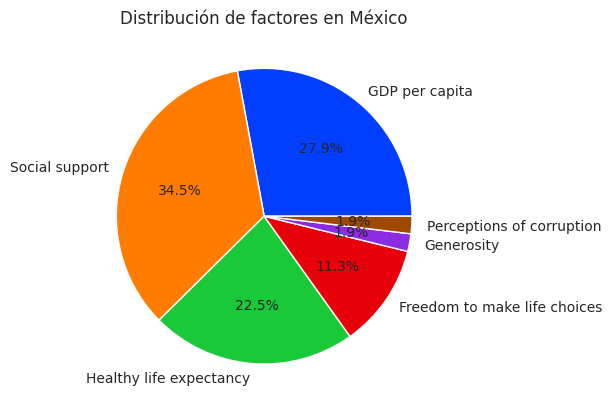

In [36]:
plt.pie(mexico.iloc[0], labels = mexico.columns, autopct='%1.1f%%')
plt.title('Distribución de factores en México')



Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.


In [8]:
paises = happiness.loc[happiness['Country or region'].isin(['Mexico','Peru','France'])]
paises = pd.concat([paises,happiness[happiness.Score == happiness.Score.max()]])
paises = pd.concat([paises,happiness[happiness.Score == happiness.Score.min()]])
paises = paises.set_index('Country or region')
paises = paises.drop(columns=['Overall rank'])
paises

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,
Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
France,6.592,1.324,1.472,1.045,0.436,0.111,0.183
Peru,5.697,0.960,1.274,0.854,0.455,0.083,0.027
Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


Text(0.5, 1.0, 'Comparación de factores en países seleccionados')

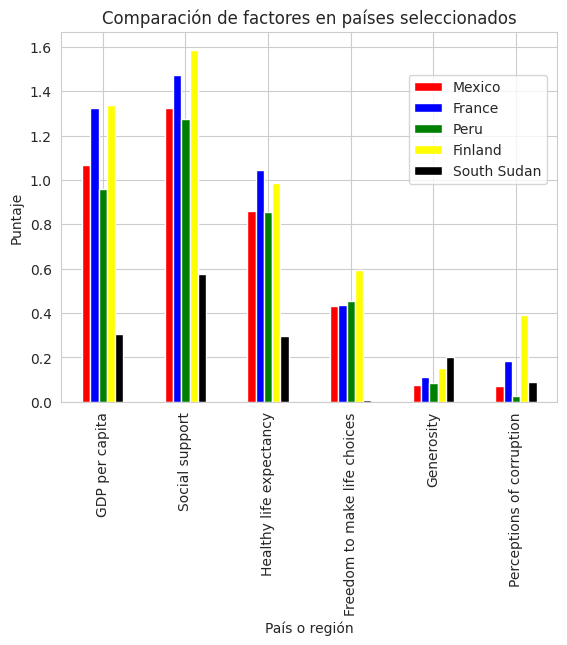

In [9]:
# Remove the 'hue' argument and use the 'color' argument instead
paises_sin_score = paises.drop(columns=['Score'])
paises_sin_score.T.plot(kind = 'bar', color=['red', 'blue', 'green', 'yellow', 'black', 'orange','purple'])
plt.legend(loc=(0.7,0.59))
plt.xlabel('País o región')
plt.ylabel('Puntaje')
plt.title('Comparación de factores en países seleccionados')

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

In [10]:
fig = plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace = 0.4)

happiness_sin_score = happiness.drop(columns=['Score'])
#plt.subplot(1,6,1)
#plt.scatter(happiness['Score'], happiness['GDP per capita'])

# for col in happiness_sin_score.columns:
#   plt.subplot(1,6,happiness_sin_score.columns.get_loc(col)+1)
#   plt.scatter(happiness['Score'], happiness_sin_score[col])





<Figure size 1700x500 with 0 Axes>

In [11]:
factores = happiness_sin_score.columns
factores = factores.to_list()

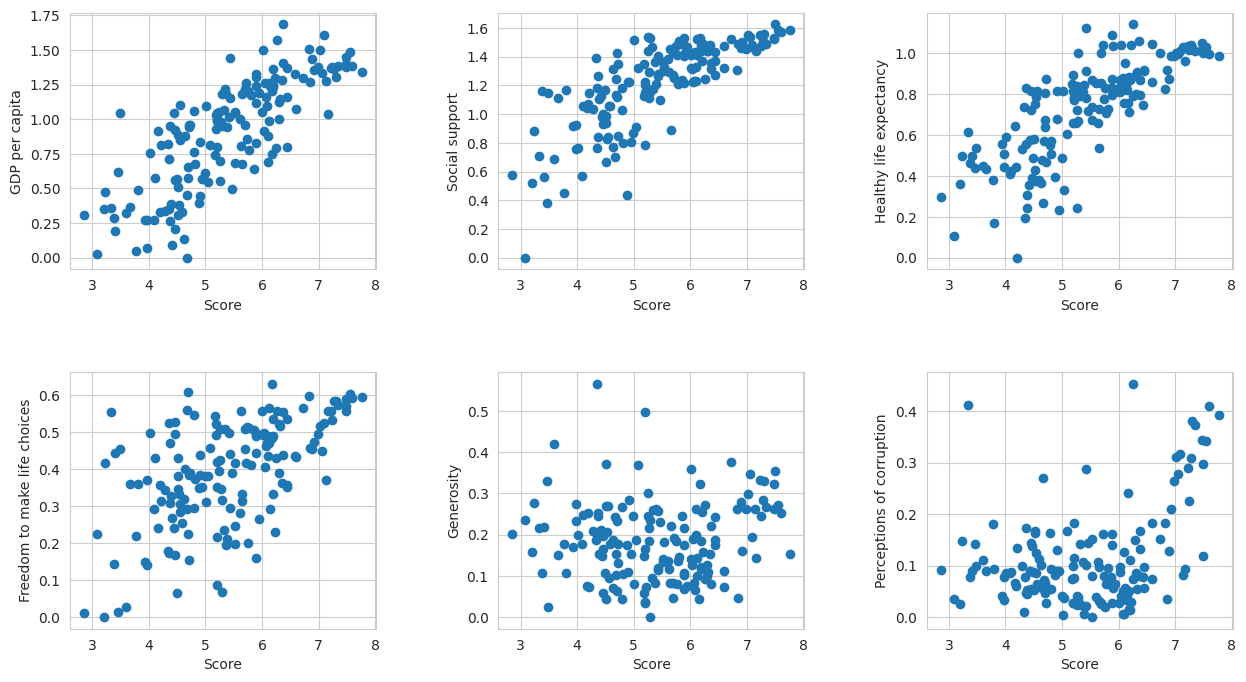

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

for i, factor in enumerate(factores):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(happiness['Score'], happiness[factor])
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel(factor)



Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.


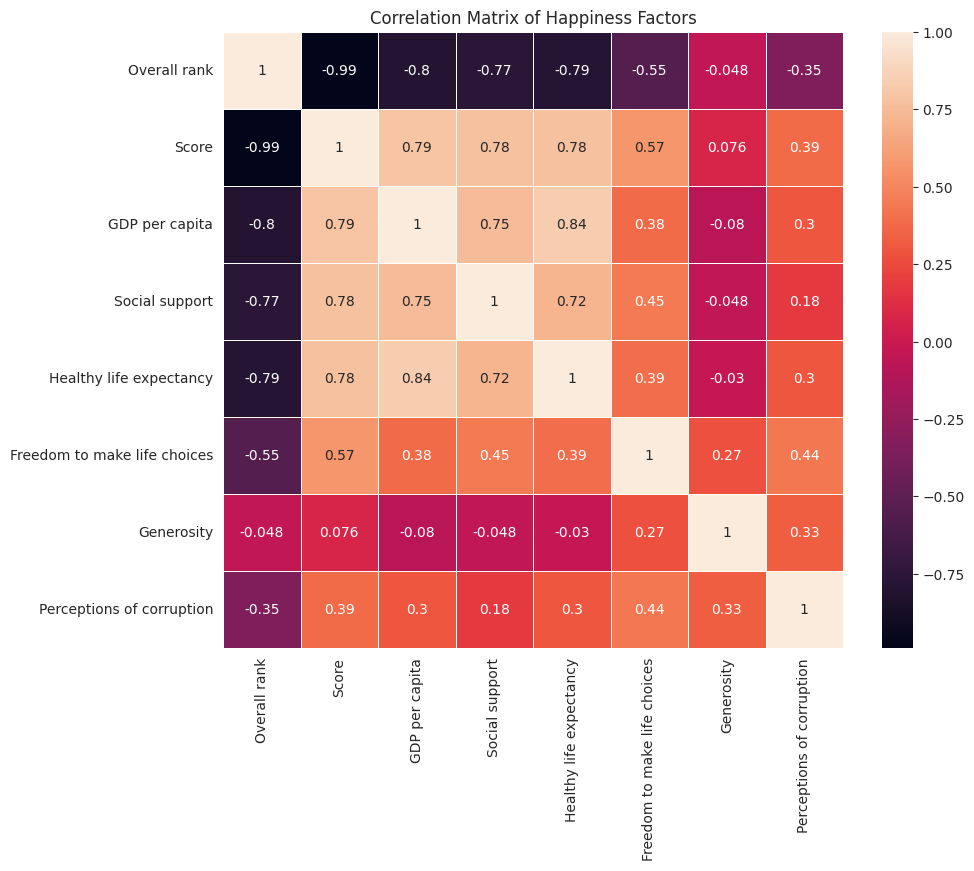

In [13]:
numeric = happiness.select_dtypes(include=['number']).columns
corr = happiness[numeric].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5)
plt.title('Correlation Matrix of Happiness Factors')
plt.show()

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [24]:
metadata = pd.read_csv('Metadata.csv')
merged_data = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')
world_happiness = merged_data.groupby('Region')['Score'].mean().reset_index()

In [28]:
color = ['red', 'blue', 'green', 'yellow', 'black', 'orange','purple']

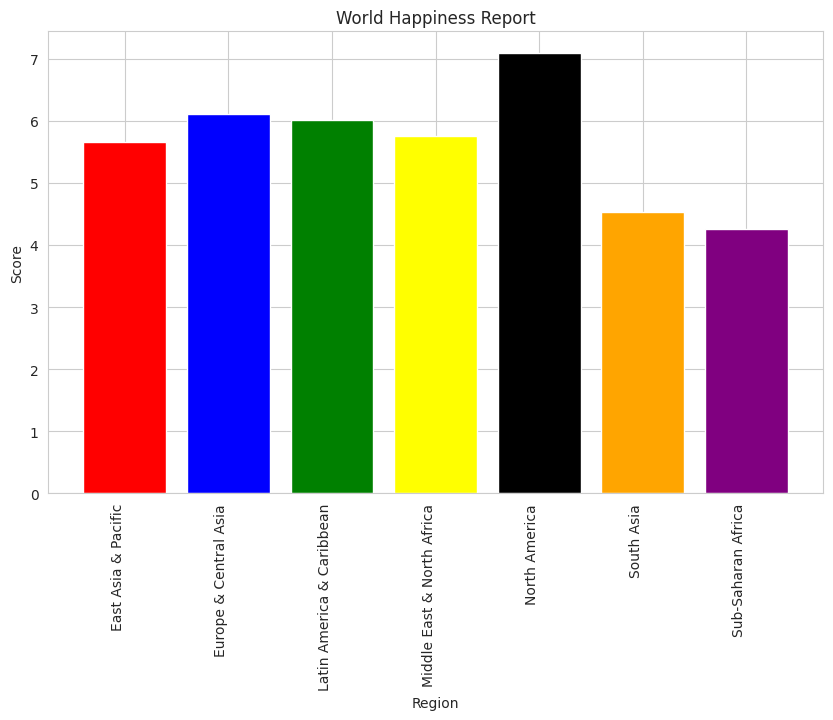

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(world_happiness['Region'], world_happiness['Score'], color = color)
plt.xlabel('Region')
plt.ylabel('Score')
plt.title('World Happiness Report')
plt.xticks(rotation=90, ha='right')
plt.show()